## Try Pytorch with Digit Recognition

* Reference: https://www.analyticsvidhya.com/blog/2018/02/pytorch-tutorial/
  * Some functions are wrong, some are out of dated in this tutorial. Better to use my code below.
* To compare with Keras code in Digit Recognition: https://github.com/hanhanwu/Hanhan_Data_Science_Practice/blob/master/AI_Experiments/digital_recognition_Keras.ipynb

In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
import imageio as io
from sklearn.metrics import accuracy_score

import torch

# Get data from here: https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-digits/

Populating the interactive namespace from numpy and matplotlib


In [2]:
seed = 10
rng = np.random.RandomState(seed)

In [3]:
train = pd.read_csv('Train_digits/train.csv')
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


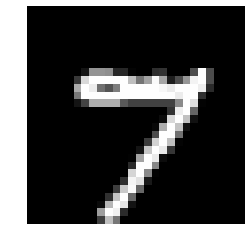

In [4]:
# randomly display an image
img_name = rng.choice(train.filename)
training_image_path = 'Train_digits/Images/train/' + img_name

training_img = io.imread(training_image_path, as_gray=True)

pylab.imshow(training_img, cmap='gray')
pylab.axis('off')
pylab.show()

In [5]:
# This is just 1 image
print(training_img.shape)
training_img[0]  # each image has 28x28 pixel square, 784 pixels in total

(28, 28)


Image([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
# store all images as numpy arrays, to make data manipulation easier

temp = []
for img_name in train.filename:
    training_image_path = 'Train_digits/Images/train/' + img_name
    training_img = io.imread(training_image_path, as_gray=True)  # !!! as_gray param makes a difference here!!
    img = training_img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')  # 784 pixels per image 

train_y = train.label.values

With `as_gray` param in `io.imread()`, it will help you get train_x, train_y have the same length. Otherwise there will be so much troubles in creating batches later.

In [8]:
print(train_x.shape)
train_x

(49000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
print(train_y.shape)  # 49000 images in total
train_y

(49000,)


array([4, 9, 1, ..., 9, 3, 0], dtype=int64)

In [10]:
# create validation set
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

print(train_x.shape, train_y.shape)
print(train_x)
print(train_y)

(34300, 784) (34300,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[4 9 1 ... 4 0 6]


In [11]:
# Using Pytorch to build the model
from torch.autograd import Variable

## number of neurons in each layer
input_num_units = 28*28  # 784 pixels per image
hidden_num_units = 500
output_num_units = 10  # 0 - 9, 10 digits

## set variables used in NN
epochs = 5
batch_size = 128
learning_rate = 0.001

In [12]:
# define model
model = torch.nn.Sequential(
  torch.nn.Linear(input_num_units, hidden_num_units),
  torch.nn.ReLU(),
  torch.nn.Linear(hidden_num_units, output_num_units),
)
loss_fn = torch.nn.CrossEntropyLoss()

# define optimization algorithm
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
# preprocess a batch of dataset
def preproc(unclean_batch_x):
    """Convert values to range 0-1"""
    temp_batch = unclean_batch_x / unclean_batch_x.max()
 
    return temp_batch

# create a batch
def batch_creator(batch_size):
    dataset_name = 'train'
    dataset_length = eval(dataset_name+'_x').shape[0]
  
    batch_mask = rng.choice(dataset_length, batch_size)
  
    batch_x = eval(dataset_name+'_x')[batch_mask]
    batch_x = preproc(batch_x)
  
    batch_y = eval(dataset_name+'_y')[batch_mask]  # train_x, train_y has the same length
  
    return batch_x, batch_y

In [14]:
# train network
total_batch = int(train.shape[0]/batch_size)

for epoch in range(epochs):
    avg_cost = 0
    for i in range(total_batch):
        # create batch
        batch_x, batch_y = batch_creator(batch_size)
        print(batch_x)
        print()
        print(torch.from_numpy(batch_x))
        print(batch_x.shape, batch_y.shape)

        # pass that batch for training
        x, y = Variable(torch.from_numpy(batch_x)), Variable(torch.from_numpy(batch_y), requires_grad=False)
        pred = model(x)

        # get loss
        loss = loss_fn(pred, y)

        # perform backpropagation
        loss.backward()
        optimizer.step()
        avg_cost += loss.data[0]/total_batch

    print(epoch, avg_cost)
    break  # TETS

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
(128, 784) (128,)


IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number

In [97]:
dataset_length = train_x.shape[0]
batch_size = 128
batch_mask = rng.choice(dataset_length, batch_size)
batch_mask

array([29672,  4672,  3054,  5666,   683, 24643, 23637, 23080,  1017,
       13106, 23811,  4450,    35, 30466, 28226, 20246, 28435, 20112,
        2561, 19703,   415,  1473, 29440, 19142, 32160, 34298, 18087,
       16420, 29643, 27142,  2069, 33644, 19775, 10887, 14973,  4813,
        9534, 13009, 11283,  3181, 22944,  3964, 32673,  1387, 27963,
        8003, 14429,  1737, 12705, 33824, 18636, 23510,  6717,  1970,
        5438, 15729,   994, 29241,  1914, 31181, 26830, 12090, 11769,
       34194, 27523, 16685, 15157, 16156,  8354,  8354, 15454, 30967,
       31183, 27168,  1618,  4229, 27100, 26510, 26120, 10001,  8554,
       19439, 13740, 26515, 33905,  9072, 15619, 32469, 14776,   750,
        3960, 12123, 12526, 10037,  7885, 16075,  2207, 13012, 19347,
       32194, 17875, 26601, 29318, 26420,  1507, 16768, 11010,  1305,
       20370, 31652, 23524, 28387,  3260, 27242, 18264, 30174, 17652,
       33039, 16818,  1684, 13458,  2808, 22012, 18024, 14332,  3628,
       14119, 32536]

In [98]:
batch_y = eval('train').iloc[batch_mask]['label'].values

In [99]:
eval('train_x')[batch_mask]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [104]:
train_y

array([4, 9, 1, ..., 4, 0, 6], dtype=int64)

In [80]:
train.shape

(49000, 2)